In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot


In [2]:
data = pd.read_csv("dataset.csv")
del (data["Unnamed: 0"]) # Deleting unwanted column
data.head()

,gun,skin,rarity,stattrak,quality,price,quantity
0,AK-47,Point Disarray,Classified,0,Factory New,45.05,44.0
1,AK-47,Point Disarray,Classified,0,Minimal Wear,31.35,81.0
2,AK-47,Point Disarray,Classified,0,Field-Tested,19.59,122.0
3,AK-47,Point Disarray,Classified,0,Well-Worn,22.82,17.0
4,AK-47,Point Disarray,Classified,0,Battle-Scarred,16.42,40.0


In [3]:
data["rarity"].unique() ## Finding which strings we need to map to touch up the dataset

array(['Classified', 'Restricted', 'Covert', 'Mil-Spec', 'Industrial',
       'Consumer', 'Contraband'], dtype=object)

In [4]:
rarity_map = {"Consumer": 1, "Industrial": 2, "Mil-Spec": 3, "Restricted": 4,
              "Classified": 5, "Covert": 6, "Contraband": 7}

data["rarity"] = data["rarity"].map(rarity_map) ## Mapping numeric values to rarity
data.head()


,gun,skin,rarity,stattrak,quality,price,quantity
0,AK-47,Point Disarray,5,0,Factory New,45.05,44.0
1,AK-47,Point Disarray,5,0,Minimal Wear,31.35,81.0
2,AK-47,Point Disarray,5,0,Field-Tested,19.59,122.0
3,AK-47,Point Disarray,5,0,Well-Worn,22.82,17.0
4,AK-47,Point Disarray,5,0,Battle-Scarred,16.42,40.0


In [5]:
original_length = len(data)
data = data.dropna() ##Dropping NaN values from the dataset
print(original_length - len(data), "NaN items dropped.")

342 NaN items dropped.


In [6]:
data["price"] = pd.to_numeric(data["price"], downcast="float") #Downcasting the prices to floats from strings

In [7]:
## BEGIN SCREWING AROUND

In [8]:
'''
This builds a new dataframe that averages the different prices of each skin's condition.
The end result is a dataframe that has a weapon, it's skin, that skin's rarity level, and its average price.
'''

new_data = pd.DataFrame(columns=['gun', 'skin', 'rarity', 'stattrak', 'avg-price'])
guns = data["gun"].unique()

for gun in guns:
    g = data[data["gun"].str.match(gun)]
    skins = g["skin"].unique()
    #print(skins)
    for s in skins:
        tempDf = data[(data['gun'] == gun) & (data['skin'] == s)]
        groups = tempDf["stattrak"].unique()
        lister = []
        for group in groups:
            g_list = tempDf[(tempDf['stattrak'] == group)]
            #print(g_list)
            new_d = {'gun':gun, 'skin':s, 'rarity':g_list['rarity'].mean(), 'stattrak':group, 'avg-price':g_list['price'].mean()}
            new_data = new_data.append(new_d, ignore_index=True)


In [9]:
new_data["rarity"] = pd.to_numeric(new_data["rarity"], downcast="integer")
del (new_data["skin"])


In [10]:
new_data.head()

,gun,rarity,stattrak,avg-price
0,AK-47,5,0,27.046001
1,AK-47,5,1,69.606003
2,AK-47,4,0,8.322500
3,AK-47,4,1,25.054998
4,AK-47,6,0,83.848000


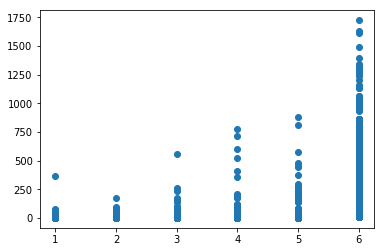

In [11]:
pyplot.scatter(new_data["rarity"], new_data["avg-price"])
#This is a pretty basic scatter plot with rarity and average price. Let's add some more layers to see what's happening.

In [12]:
##Working with Seaborn, a visualization library built on matplotlib
## If this doesn't run then you need to pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True) ##This is from their website -- they recommend these settings



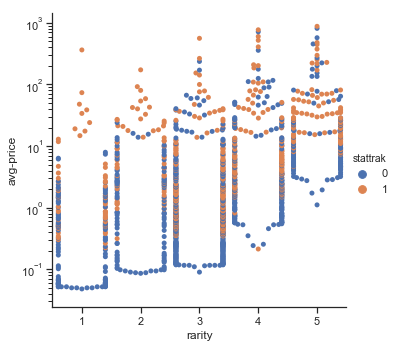

In [16]:
r = sns.catplot(x="rarity", y="avg-price", hue="stattrak", kind="swarm", data=new_data.query("rarity != 6"))
r.set(yscale="log");

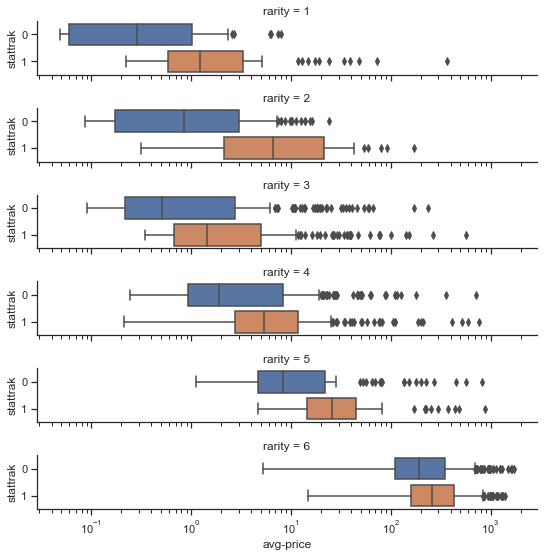

In [33]:
g = sns.catplot(x="avg-price", y="stattrak", row="rarity",
                kind="box", orient="h", height=1.3, aspect=6,
                data=new_data)
g.set(xscale="log");
#g.set(xlim=(0,200));

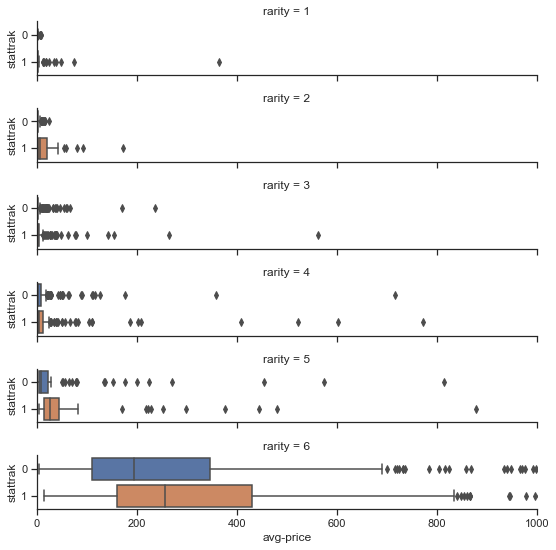

In [34]:
g = sns.catplot(x="avg-price", y="stattrak", row="rarity",
                kind="box", orient="h", height=1.3, aspect=6,
                data=new_data) #data=new_data.query("rarity != 6"))

#g.set(xscale="log");
g.set(xlim=(0,1000));

KeyboardInterrupt: 

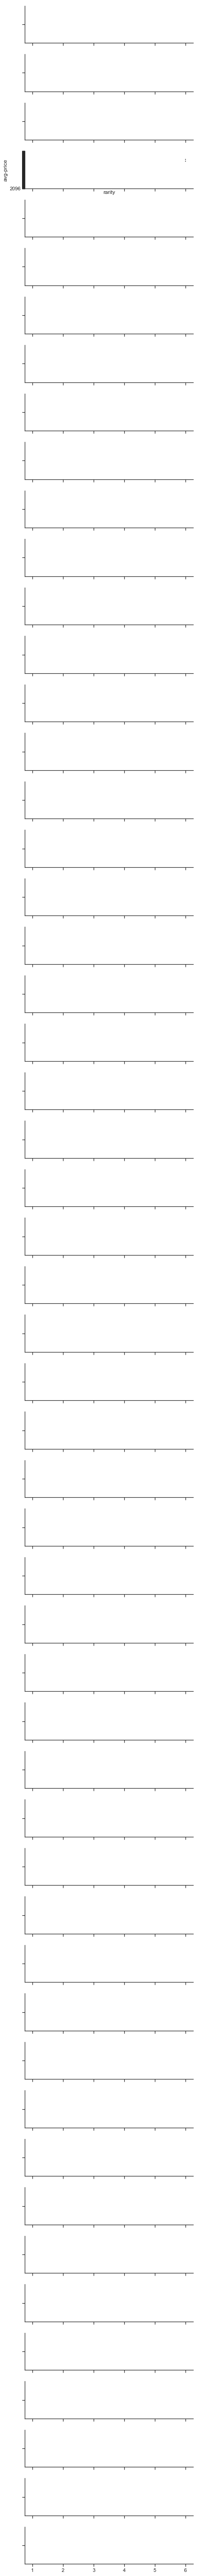

In [22]:
f = sns.catplot(x="rarity", y="avg-price", row="gun",
                kind="box", orient="h", height=1.5, aspect=4,
                data=new_data.query("gun != 'AK-47'")) #data=new_data.query("rarity != 6"))

#g.set(xscale="log");
#f.set(xlim=(0,1000));

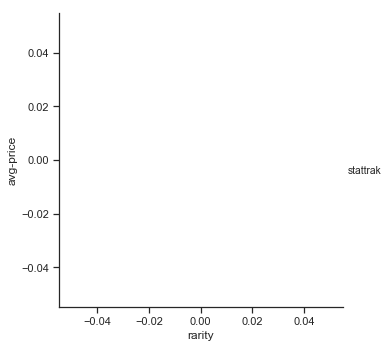

In [37]:
sns.lmplot(x="rarity", y="avg-price", hue="stattrak", data=new_data.query("gun == 'AK-47'"));
